# A Jupyter notebook that builds Mohr's Circles based on user input

In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%config InlineBackend.rc = {'font.size': 10, 'figure.figsize': (10.0, 6.0), 'figure.facecolor': (1, 1, 1, 0), 'figure.subplot.bottom': 0.125, 'figure.edgecolor': (1, 1, 1, 0), 'figure.dpi': 72}
%matplotlib inline

In [2]:
def mohr_circle():
    print('PLEASE CONSIDER SIGNS BEFORE ENTERING YOUR VALUES')
    stress_x=float(input('Enter the stress in the x-direction: '))
    stress_y=float(input('Enter the stress in the y-direction: '))
    shear=float(input('Enter the shear: '))
    
    stress_avg=(stress_x+stress_y)/2
    stress_max=stress_avg+(((stress_x-stress_y)/2)**2+shear**2)**0.5
    stress_min=stress_avg-(((stress_x-stress_y)/2)**2+shear**2)**0.5
    R=((((stress_x-stress_y)/2)**2)+shear**2)**0.5     #Also max shear
    circle_eqn=((stress_x-stress_avg)**2)-shear**2-R**2
    
    if shear==0:
        theta_p=0
        theta_s=0
    else:
        theta_p=0.5*mt.degrees(mt.atan((2*shear)/(stress_x-stress_y)))
        if theta_p<=0:
            a=-1
        else:
            a=1
        theta_s=a*0.5*mt.degrees(mt.atan((stress_x-stress_y)/(2*shear)))
        
    if abs(stress_min)>abs(stress_max):
        maxi=stress_min
        mini=stress_max
    elif abs(stress_max)>abs(stress_min):
        maxi=stress_max
        mini=stress_min
        
        #principle planes
        
    shear_lim_p=np.arange(0,0.5*(R+1),1)
    shear_lim_n=np.arange(0,-0.5*R-1,-1)
    
    
    princ_x_slope=(theta_p/abs(theta_p))*mt.tan(mt.radians(theta_p))
    princ_y_slope=(theta_p/abs(theta_p))*mt.tan(mt.radians((theta_p+90)))
    
    
    #princ_x=princ_x_slope*shear_lim+stress_avg
    #princ_y=princ_y_slope*shear_lim+stress_avg
    
    if princ_x_slope<0:
        range_x=shear_lim_n
        princ_x=princ_x_slope*range_x+stress_avg
        
    elif princ_x_slope>0:
        range_x=shear_lim_p
        princ_x=princ_x_slope*range_x+stress_avg
        
    if princ_y_slope<0:
        range_y=shear_lim_n
        princ_y=princ_y_slope*range_y+stress_avg
        
    elif princ_y_slope>0:
        range_y=shear_lim_p
        princ_y=princ_y_slope*range_y+stress_avg
        
    
    n=100
    t=np.linspace(0,2*np.pi,n+1)
    x=R*np.cos(t)+stress_avg
    y=R*np.sin(t)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.grid(True)
    plt.axis('equal')
    plt.plot(x,y,'r')
    plt.axvline(0,color='black')
    plt.axhline(0,color='black')
    plt.xlabel('Axial Stress')
    plt.ylabel('Shearing Stress')
    plt.title('Mohr Circle')
    plt.plot(princ_x,range_x,'g',linestyle=':')
    plt.plot(princ_y,range_y,'g',linestyle=':')
    plt.arrow(stress_avg,0,(stress_x-stress_avg),-shear)
    plt.arrow(stress_avg,0,(stress_y-stress_avg),shear)
    plt.figure(figsize=[60,40])
    ax.annotate(s='X',
                xy=(stress_x,-shear),
                arrowprops=dict(facecolor='blue', shrink=0.05))
    ax.annotate(s='Y',
                xy=(stress_y,shear),
                arrowprops=dict(facecolor='blue', shrink=0.05))
    ax.annotate(s='Max Stress',
                 xy=(maxi,0),
                 xytext=(maxi,0.5*shear),
                 arrowprops=dict(facecolor='blue', shrink=0.05))
    ax.annotate(s='Min Stress',
                 xy=(mini,0),
                 xytext=(mini,0.5*shear),
                 arrowprops=dict(facecolor='blue', shrink=0.05))
    plt.show
    
    
    print(' ')
    print(f'Max shear: {np.round(R,3)}')
    print(f'Max stress: {np.round(maxi,3)}\nMin stress: {np.round(mini,3)}')
    print(f'Average normal stress: {np.round(stress_avg,3)}\n')
    print(f'Principal angle: {np.round(theta_p,2)} degrees')
    print(f'Principal planes: {np.round(theta_p,2)} degrees and {np.round(theta_p+90,2)} degrees')
    print(f'Angle to the shear plane: {np.round(theta_s,2)} degrees')


PLEASE CONSIDER SIGNS BEFORE ENTERING YOUR VALUES
Enter the stress in the x-direction: 6.67153
Enter the stress in the y-direction: 0
Enter the shear: 1.7857
 
Max shear: 3.784
Max stress: 7.119
Min stress: -0.448
Average normal stress: 3.336

Principal angle: 14.08 degrees
Principal planes: 14.08 degrees and 104.08 degrees
Angle to the shear plane: 30.92 degrees


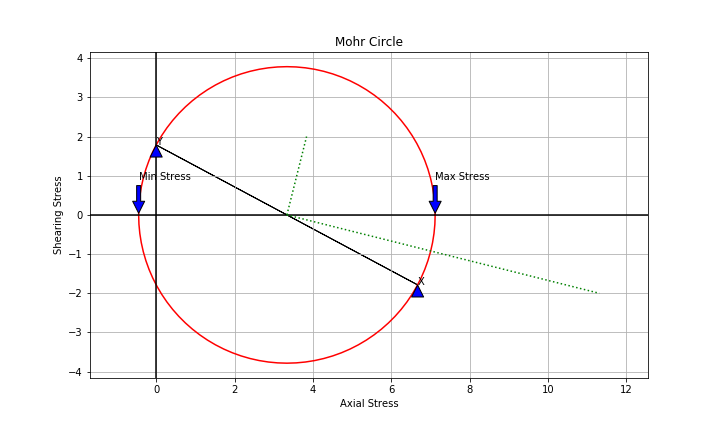

<Figure size 4320x2880 with 0 Axes>

In [5]:
mohr_circle()